#Decision Tree

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('diabetes.csv', delimiter=',', header=(0))

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Modeling

In [ ]:
# Menentukan variabel x dan y

feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_cols]
Y = df['Outcome']

In [ ]:
# Split Data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Decision Tree Standard

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

In [ ]:
from sklearn import metrics

print("Akurasi Decision Tree Standard;", metrics.accuracy_score(y_test, y_pred))
# y_test adalah kelas actual/sebenarnya, y_pred adalah kelas prediksi

Akurasi Decision Tree Standard; 0.7142857142857143


[Text(0.3985252808988764, 0.9705882352941176, 'x[1] <= 129.5\ngini = 0.449\nsamples = 537\nvalue = [354, 183]'),
 Text(0.14571629213483145, 0.9117647058823529, 'x[5] <= 26.3\ngini = 0.329\nsamples = 357\nvalue = [283, 74]'),
 Text(0.0449438202247191, 0.8529411764705882, 'x[5] <= 9.1\ngini = 0.06\nsamples = 97\nvalue = [94, 3]'),
 Text(0.02247191011235955, 0.7941176470588235, 'x[0] <= 7.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.011235955056179775, 0.7352941176470589, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.033707865168539325, 0.7352941176470589, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.06741573033707865, 0.7941176470588235, 'x[6] <= 0.669\ngini = 0.022\nsamples = 91\nvalue = [90, 1]'),
 Text(0.056179775280898875, 0.7352941176470589, 'gini = 0.0\nsamples = 76\nvalue = [76, 0]'),
 Text(0.07865168539325842, 0.7352941176470589, 'x[6] <= 0.705\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.06741573033707865, 0.6764705882352942, 'gini = 0.0\nsampl

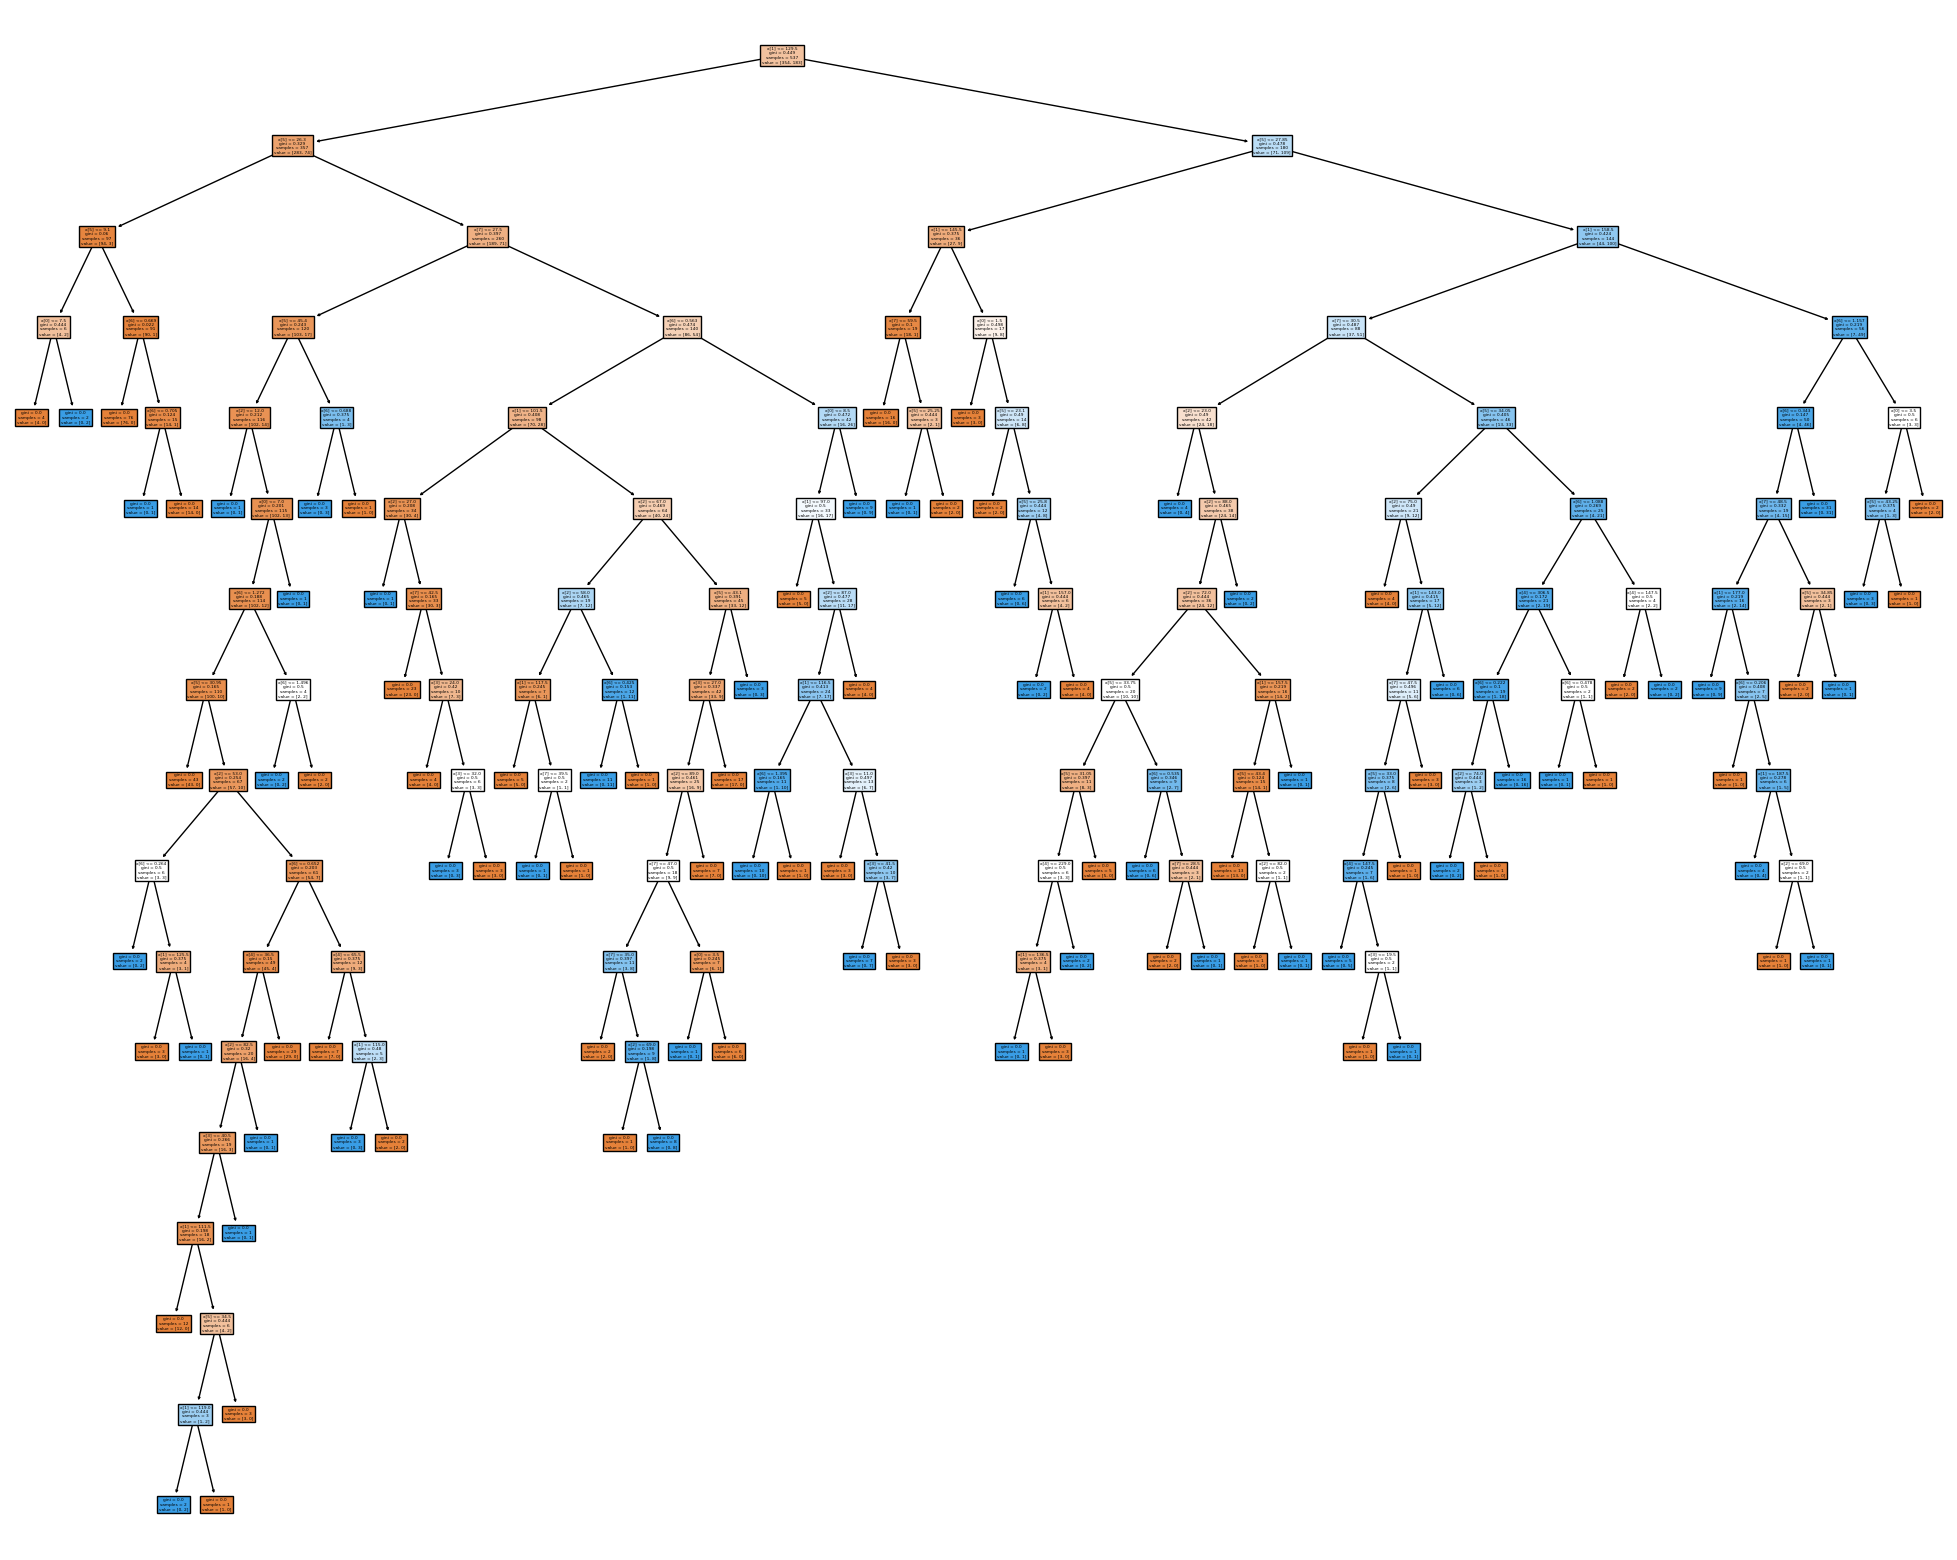

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled = True)

In [ ]:
clf_prun = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf_prun = clf_prun.fit(x_train, y_train)

y_pred_prun = clf_prun.predict(x_test)

print('Akurasi Decision Tree dengan Pruning:', metrics.accuracy_score(y_test, y_pred_prun))

Akurasi Decision Tree dengan Pruning: 0.7705627705627706


[Text(0.5, 0.875, 'x[1] <= 127.5\nentropy = 0.926\nsamples = 537\nvalue = [354, 183]'),
 Text(0.25, 0.625, 'x[5] <= 26.45\nentropy = 0.72\nsamples = 342\nvalue = [274, 68]'),
 Text(0.125, 0.375, 'x[5] <= 9.1\nentropy = 0.201\nsamples = 96\nvalue = [93, 3]'),
 Text(0.0625, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.1875, 0.125, 'entropy = 0.088\nsamples = 90\nvalue = [89, 1]'),
 Text(0.375, 0.375, 'x[7] <= 27.5\nentropy = 0.833\nsamples = 246\nvalue = [181, 65]'),
 Text(0.3125, 0.125, 'entropy = 0.544\nsamples = 112\nvalue = [98, 14]'),
 Text(0.4375, 0.125, 'entropy = 0.958\nsamples = 134\nvalue = [83, 51]'),
 Text(0.75, 0.625, 'x[5] <= 28.15\nentropy = 0.977\nsamples = 195\nvalue = [80, 115]'),
 Text(0.625, 0.375, 'x[1] <= 145.5\nentropy = 0.82\nsamples = 43\nvalue = [32, 11]'),
 Text(0.5625, 0.125, 'entropy = 0.402\nsamples = 25\nvalue = [23, 2]'),
 Text(0.6875, 0.125, 'entropy = 1.0\nsamples = 18\nvalue = [9, 9]'),
 Text(0.875, 0.375, 'x[1] <= 158.5\nentropy = 0.

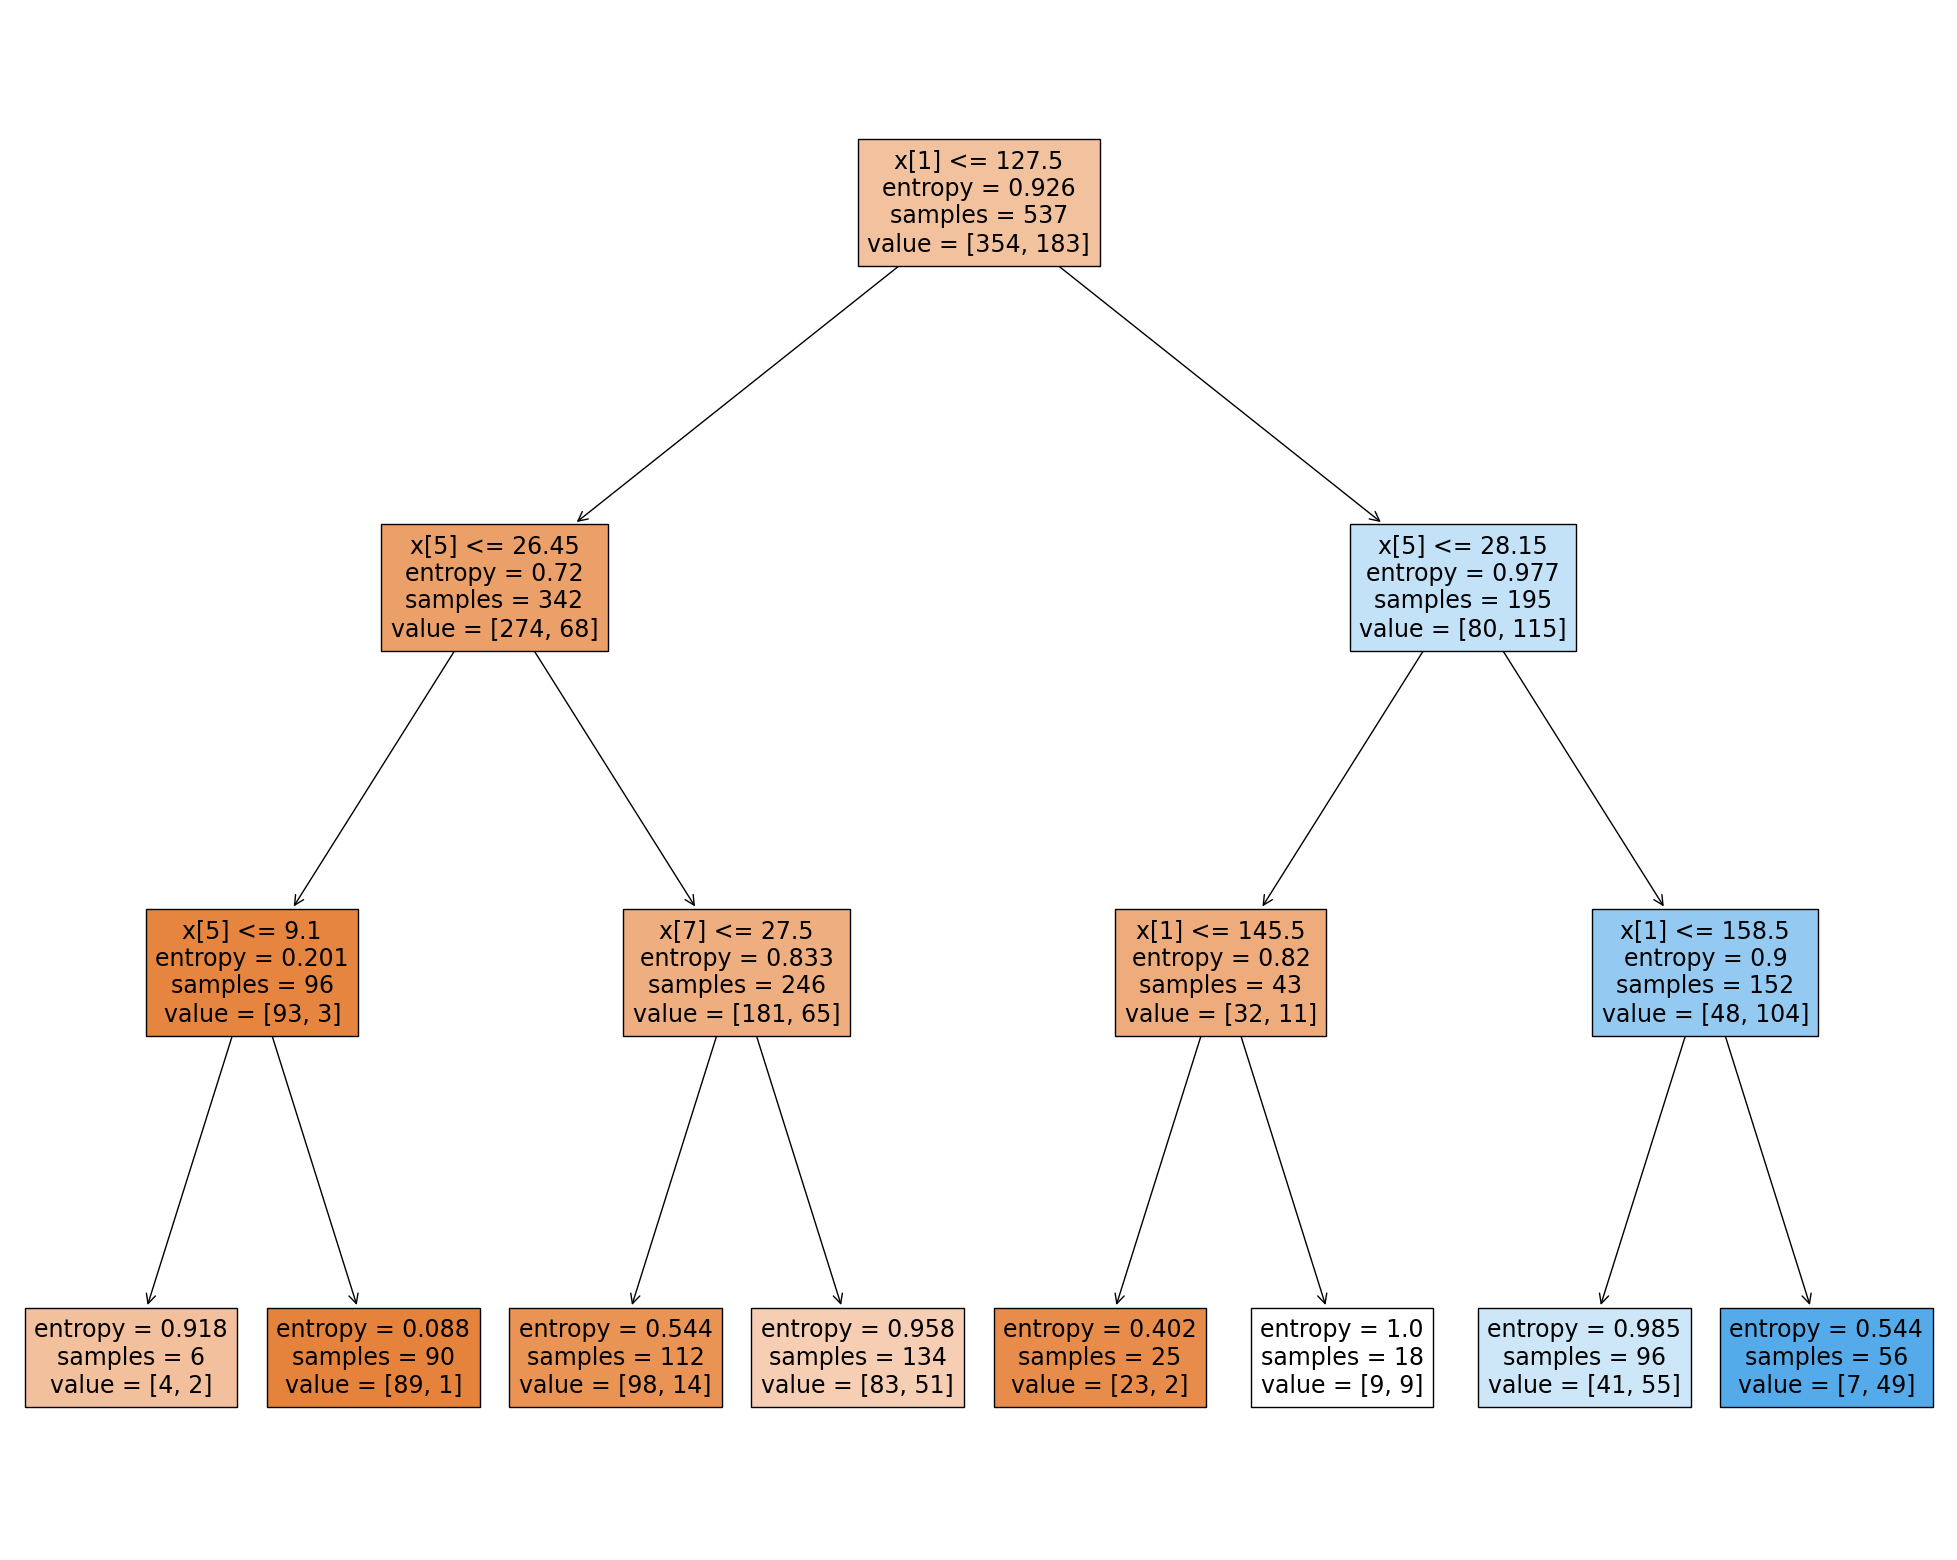

In [ ]:
fig = plt.figure(figsize=(25, 20))
tree.plot_tree(clf_prun, filled=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print('Akurasi Random Forest tanpa Pruning: ', metrics.accuracy_score(y_test, y_pred_rf))

Akurasi Random Forest tanpa Pruning:  0.7965367965367965


In [ ]:
rf_prun = RandomForestClassifier(criterion = 'entropy', max_depth=3, max_leaf_nodes=5, class_weight=None)
rf_prun = rf_prun.fit(x_train, y_train)
y_pred_rf_prun = rf_prun.predict(x_test)

print('Akurasi Random Forest dengan Pruning: ', metrics.accuracy_score(y_test, y_pred_rf_prun))

Akurasi Random Forest dengan Pruning:  0.7619047619047619


[Text(0.5, 0.875, 'x[5] <= 27.85\nentropy = 0.934\nsamples = 332\nvalue = [349, 188]'),
 Text(0.25, 0.625, 'x[0] <= 1.5\nentropy = 0.568\nsamples = 98\nvalue = [136, 21]'),
 Text(0.125, 0.375, 'entropy = 0.214\nsamples = 34\nvalue = [57, 2]'),
 Text(0.375, 0.375, 'entropy = 0.71\nsamples = 64\nvalue = [79, 19]'),
 Text(0.75, 0.625, 'x[1] <= 129.5\nentropy = 0.989\nsamples = 234\nvalue = [213, 167]'),
 Text(0.625, 0.375, 'x[5] <= 28.45\nentropy = 0.851\nsamples = 151\nvalue = [175, 67]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 7]'),
 Text(0.75, 0.125, 'entropy = 0.82\nsamples = 147\nvalue = [175, 60]'),
 Text(0.875, 0.375, 'entropy = 0.849\nsamples = 83\nvalue = [38, 100]')]

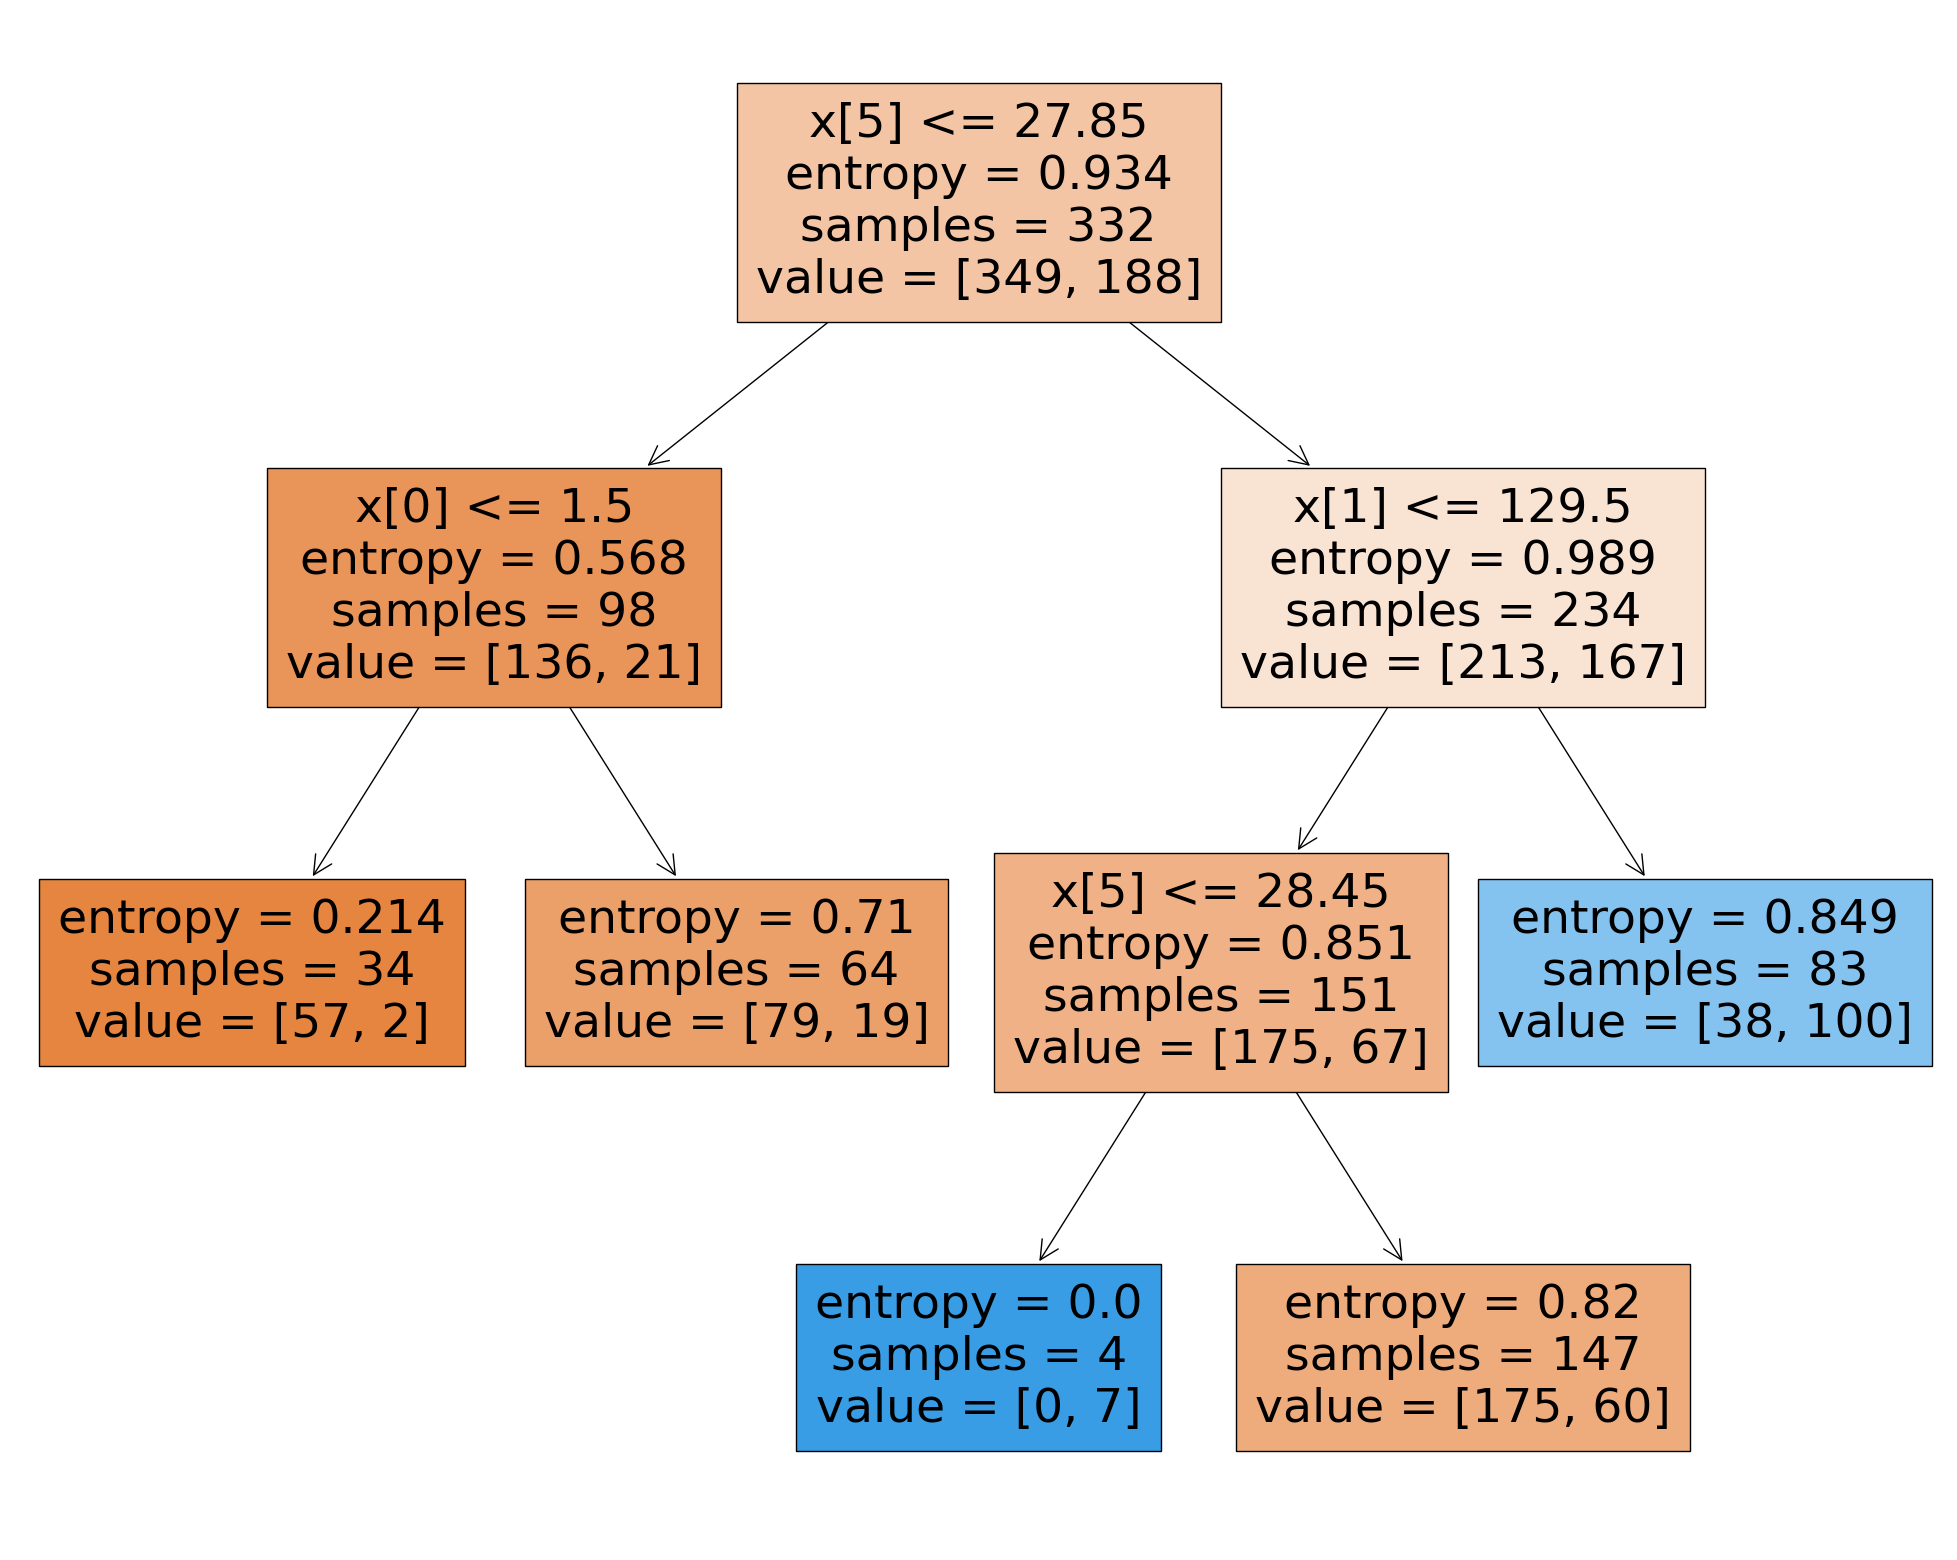

In [ ]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(rf_prun.estimators_[0], filled = True)

# Feature Importance

Feature: 0, Score: 0.08598
Feature: 1, Score: 0.24501
Feature: 2, Score: 0.09113
Feature: 3, Score: 0.07697
Feature: 4, Score: 0.07317
Feature: 5, Score: 0.16869
Feature: 6, Score: 0.12829
Feature: 7, Score: 0.13077


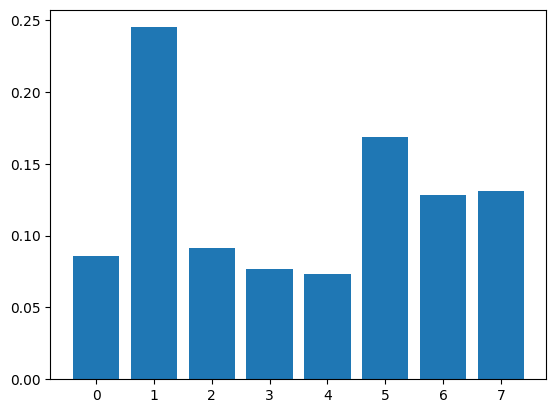

In [ ]:
importance = rf.feature_importances_

for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
importance_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Bagi ke x dan y
X1 = df[importance_cols]

x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y, test_size=0.3, random_state=1)

rf1 = RandomForestClassifier()
rf1 = rf1.fit(x1_train, y1_train)
y1_pred = rf1.predict(x1_test)

print('Akurasi RF dengan Importance: ', metrics.accuracy_score(y1_test, y1_pred))

Akurasi RF dengan Importance:  0.8051948051948052


# Classification SVM

In [ ]:
df = pd.read_csv('customers.csv')

In [ ]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
feature_df = df[['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
X_cust = np.asarray(feature_df)
X_cust[0:5]

array([[    3, 12669,  9656,  7561,   214,  2674,  1338],
       [    3,  7057,  9810,  9568,  1762,  3293,  1776],
       [    3,  6353,  8808,  7684,  2405,  3516,  7844],
       [    3, 13265,  1196,  4221,  6404,   507,  1788],
       [    3, 22615,  5410,  7198,  3915,  1777,  5185]])

In [ ]:
# Target adalah Channel

df['Channel'] = df['Channel'].astype('int')
Y_cust = np.asarray(df['Channel'])
Y_cust[0:5]

array([2, 2, 2, 1, 2])

Modeling SVM

In [ ]:
xcust_train, xcust_test, ycust_train, ycust_test = train_test_split(X_cust, Y_cust, test_size=0.2, random_state=1)

# Kernel RBF
from sklearn import svm

svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(xcust_train, ycust_train)

y_pred_svm1 = svm_rbf.predict(xcust_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm_rbf = confusion_matrix(ycust_test, y_pred_svm1)

print(classification_report(ycust_test, y_pred_svm1))

              precision    recall  f1-score   support

           1       0.87      0.96      0.92        57
           2       0.92      0.74      0.82        31

    accuracy                           0.89        88
   macro avg       0.90      0.85      0.87        88
weighted avg       0.89      0.89      0.88        88



In [ ]:
# Kernel Linear
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(xcust_train, ycust_train)

y_pred_svm2 = svm_linear.predict(xcust_test)


cm_linear = confusion_matrix(ycust_test, y_pred_svm2)

print(classification_report(ycust_test, y_pred_svm2))

              precision    recall  f1-score   support

           1       0.83      0.91      0.87        57
           2       0.80      0.65      0.71        31

    accuracy                           0.82        88
   macro avg       0.81      0.78      0.79        88
weighted avg       0.82      0.82      0.81        88



In [ ]:
# Kernel Poly
svm_poly = svm.SVC(kernel='poly')
svm_poly.fit(xcust_train, ycust_train)

y_pred_svm3 = svm_poly.predict(xcust_test)

cm_poly = confusion_matrix(ycust_test, y_pred_svm3)

print(classification_report(ycust_test, y_pred_svm3))

              precision    recall  f1-score   support

           1       0.79      0.98      0.88        57
           2       0.94      0.52      0.67        31

    accuracy                           0.82        88
   macro avg       0.86      0.75      0.77        88
weighted avg       0.84      0.82      0.80        88

